<center>
<img src="https://2223moodle.isel.pt/pluginfile.php/1/theme_adaptable/logo/1631635830/logo-isel_inv3.png" width="250">
<h3>Licenciatura em Engenharia Informática e Multimédia</h3><br>
<br>
<h2>Processamento de Imagem e Visão (PIV)</h3>
<h3>1º Trabalho Laboratorial – Contagem e Classificação de Peças de Lego Retangulares </h3> 
<br>

<br>
Trabalho Realizado por:<br>
Gonçalo Silva <b>A48328</b><br>
Diogo Lobo <b>A48168</b><br>
Turma 52D<br><br>
Docente: João Pedro Costa <br> 
<br>
11 de Outubro 2024
</center>


# Estrutura do trabalho segundo os slides (Remover no fim)


Algumas notas:
1. Sugestão de organização do relatório:

Capa;

Índice;

Introdução;

Desenvolvimento

Descrição e justificação das opções tomadas e dos
métodos utilizados;

Resultados Experimentais; 

Conclusões;

Bibliografia.

2. Justificar todas opções tomadas, nomeadamente, as
transformações aplicadas e a definição dos elementos estruturantes (mas todas, não só estas)

3. Pode fazer-se em notebook Jupyter, mas deve estar organizado como um relatório

***
<br>
<a id='section0'></a>
<center><h2><b>Índice</b></h2></center>

- [Introdução;](#section1)

***
<a id='section1'></a>
## <center><b>Introdução</b></center>
<div style="text-align: justify">
<h3> Enquadramento </h3>

No contexto da Unidade Curricular de Processamento de Imagem e Visão, foi proposto como primeiro trabalho prático o desenvolvimento de um algoritmo capaz  de  contar  automaticamente  o  número de peças de Lego retangulares, colocado em cima de uma mesa;<br>
    
Este projeto tem como objetivo consolidar o conhecimento prévio da biblioteca de funções OpenCV, e aplicar os novos conhecimentos que adquirimos nas aulas práticas, tais como a identificação e classificação de objetos, para programação de aplicações de visão por computador em tempo real.<br>

<h3> Objetivo </h3>

Pretende-se desenvolver um algoritmo para contagem das peças retangulares de lego 
(dimensões  “2x2”, “2x4”, “2x6” e ”2x8”),  colocadas  em  cima  de  uma  mesa  de  superfície homogénea e clara, observadas por uma câmara, montada num tripé, ajustada de modo que o plano  do  sensor  seja  paralelo  ao  plano  da  mesa. 

O algoritmo deverá possuir alguma robustez relativamente às seguintes perturbações:  
(i) presença de outras peças de Lego no campo de visão; (ii) existência de sombras; (iii) eventual 
contacto entre peças

<h3> Métodos </h3>

Para o desenvolvimento do algoritmo, foram fornecidas várias imagens como parte do "Conjunto de Treino", que servirão para treinar o algoritmo. Posteriormente, os docentes usarão um "Conjunto de Teste" para avaliar o desempenho do algoritmo, e por isso é fundamental assegurar que este funciona bem para todo o conjunto de treino, de modo a tentar minimizar qualquer problema que possa surgir mais tarde na fase de teste.<br>

Neste relatório, detalharemos o processo de implementação do algoritmo passo a passo, apresentando os resultados obtidos para todas as imagens fornecidas com as devidas justificações, para facilitar a compreensão do funcionamento do algoritmo.
</div>

# Processo

<img src="process.png" width="500">

In [1594]:
# Imports
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import scipy.linalg as la
import cv2
import os

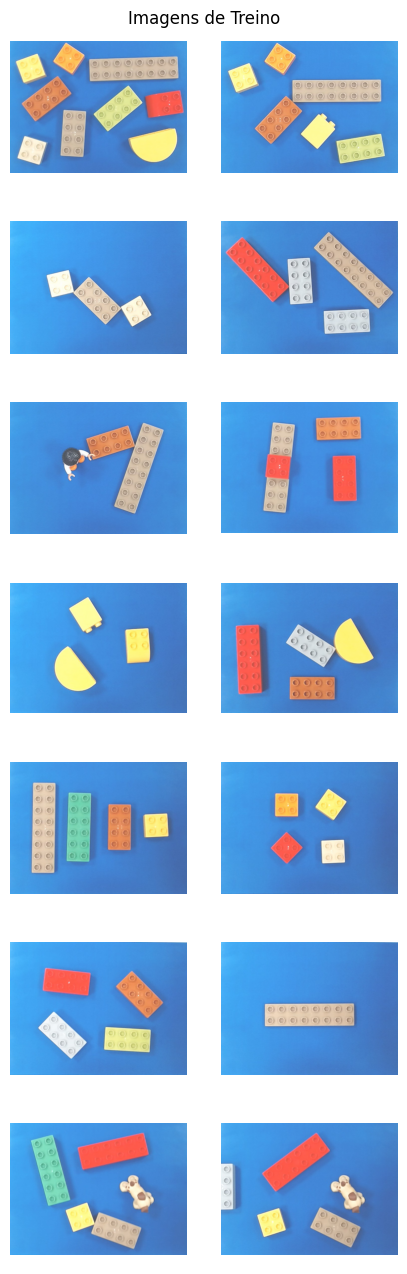

In [1595]:
#Diretoria das imagens de treino
images_dir = 'treino/'

images = []
#Obter os nomes dos ficheiros das imagens
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

#Ler as imagens de treino e adicionar ao array 'images'
for image_file in image_files:
    img = cv2.imread(images_dir + image_file)

    if img is not None:
        images.append(img)
    else:
        print("Unable to read image:", image_file)

#Representação das imagens de treino
plt.figure(figsize=(5,16))
plt.title("Imagens de Treino")
plt.axis('off')

for i, image in enumerate(images[:14]):
    plt.subplot(7, 2, i+1)  # 7 linhas, 2 colunas
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()

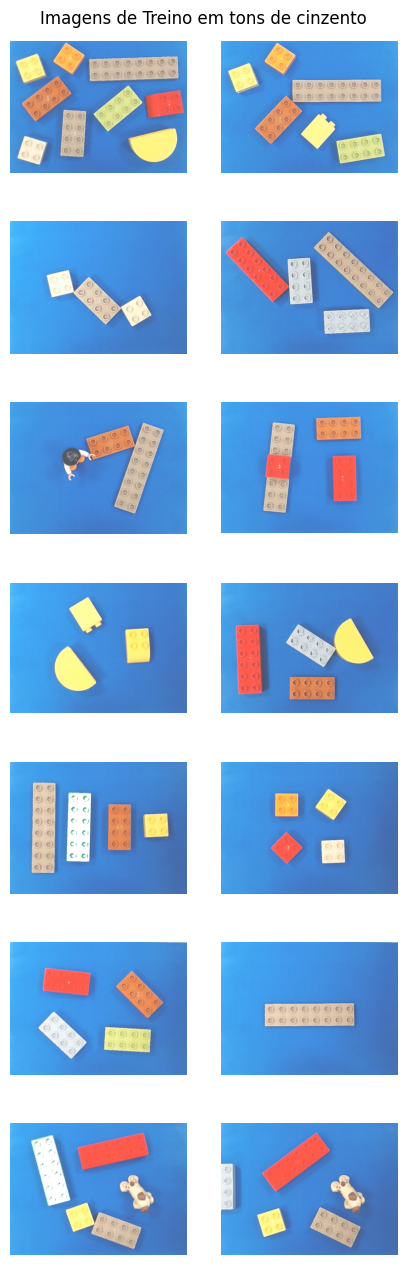

In [1596]:
backImages = []
for color in images:
    color = cv2.cvtColor(color,cv2.COLOR_BGR2RGB)
    # Definir o intervalo para a cor azul no espaço BGR (ajuste conforme necessário)
    lower_green = np.array([70, 170, 150])  # Narrower lower bound for green
    upper_green = np.array([180, 240, 210])  # Narrower upper bound for green

    # Criar uma máscara que isola o fundo azul
    mask = cv2.inRange(color, lower_green, upper_green)

    # Inverter a máscara para obter as peças (onde o fundo será removido)
    red_piece = np.zeros_like(color)
    red_piece[:] = [255, 255, 255]  # Set the entire image to red

    # Use the mask to replace the green piece with red while keeping the rest unchanged
    result = np.copy(color)
    result[mask != 0] = red_piece[mask != 0]

    # Convert back to BGR for consistent display with OpenCV
    result_bgr = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
    
    backImages.append(result_bgr)

#Representação das imagens de treino
plt.figure(figsize=(5,16))
plt.title("Imagens de Treino em tons de cinzento")
plt.axis('off')

for i, image in enumerate(backImages):
    plt.subplot(7, 2, i+1)  # 7 linhas, 2 colunas
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    plt.axis('off') 

plt.show()

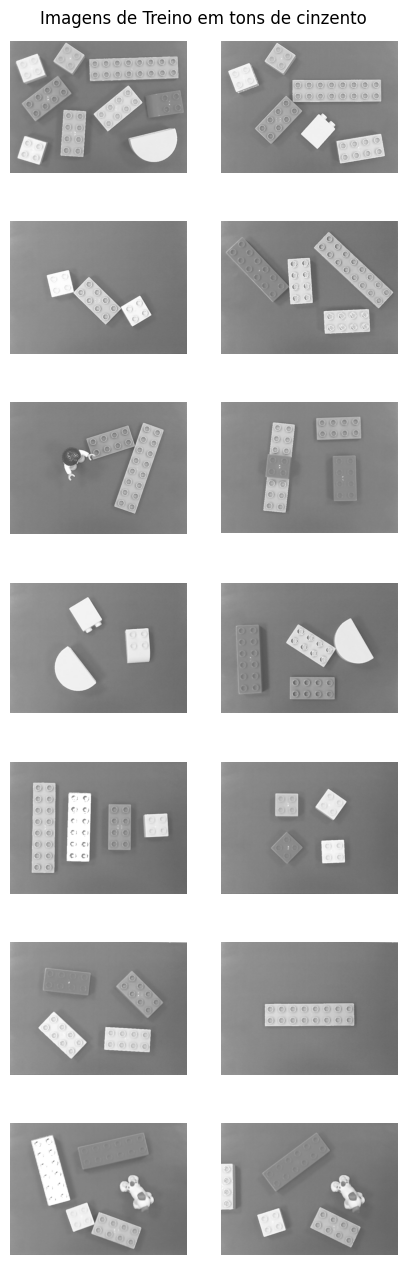

In [1597]:
grayscale_images = []

# Iterar sobre cada imagem a cores e passar para níveis de cinzento
for color_img in backImages:
    grayscale_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    
    grayscale_images.append(grayscale_img)



#Representação das imagens de treino
plt.figure(figsize=(5,16))
plt.title("Imagens de Treino em tons de cinzento")
plt.axis('off')

for i, image in enumerate(grayscale_images):
    plt.subplot(7, 2, i+1)  # 7 linhas, 2 colunas
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()

(530, 706, 3)


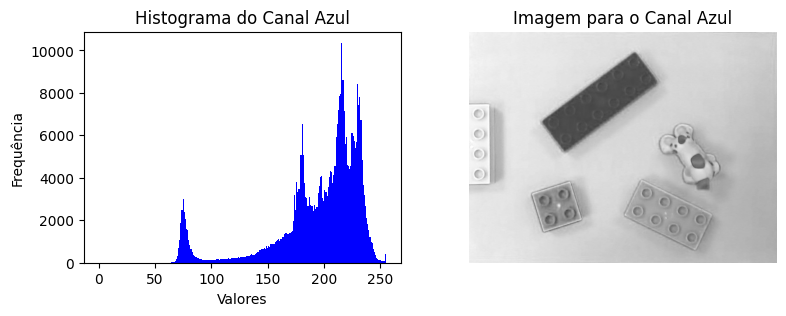

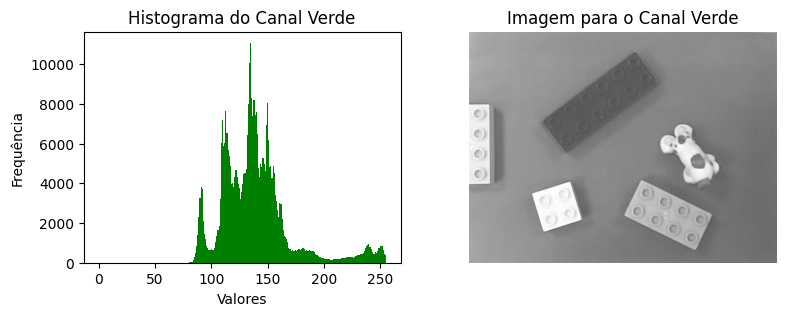

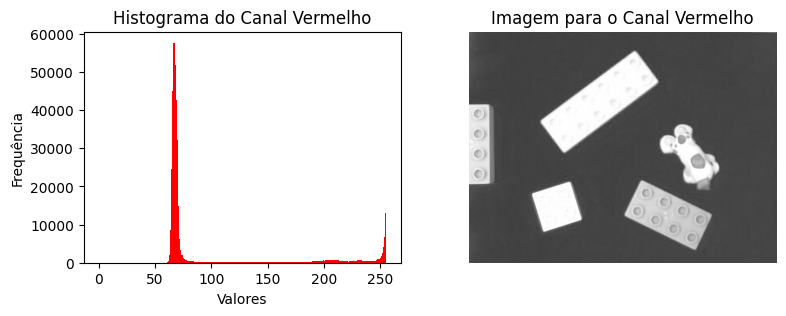

In [1598]:
# imageGray = cv2.cvtColor(imageFinal,cv2.COLOR_RGB2GRAY)
# imageGray = cv2.cvtColor(imageFinal,cv2.COLOR_RGB2GRAY)

colorC = ('b','g','r') 
colorN = np.array(['Azul','Verde','Vermelho'])   

#valores de quantificação (0-255)
vq = np.arange(0, 256)

#Histograma para cada canal de cor e respetiva imagem para cada canal
#Canal 0 -> Azul
#Canal 1 -> Verde
#Canal 2 -> Vermelho

print(img.shape)

for i,c in enumerate(colorC):
    plt.figure(figsize=(9,3))
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(121)
    plt.bar(vq,np.squeeze(histr),color = c, width = 1)
    plt.title('Histograma do Canal ' +  colorN[i])
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.subplot(122)
    plt.title('Imagem para o Canal ' +  colorN[i])
    plt.imshow(cv2.cvtColor(img[:,:,i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


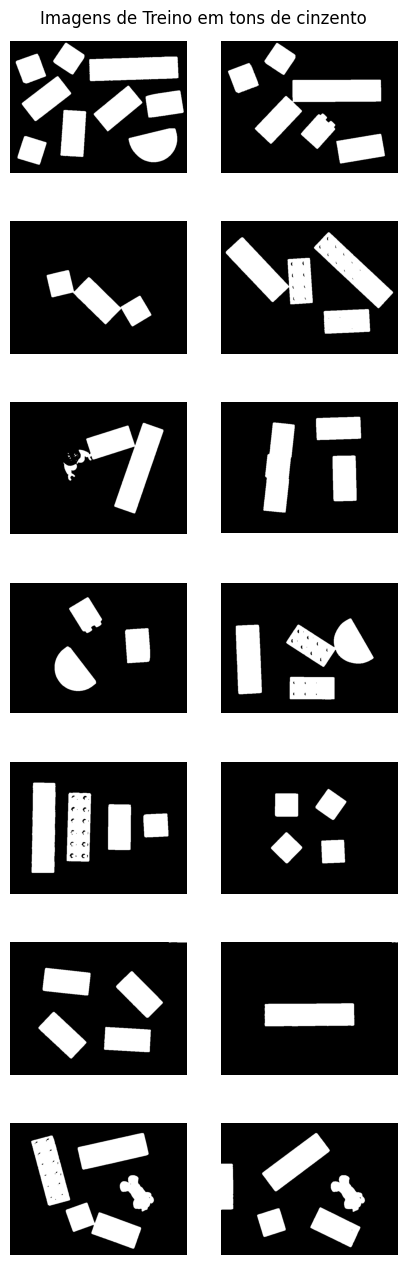

In [1599]:
binImages = []
i = 1
output_dir = 'output_images'
for image in backImages:
    aux = cv2.GaussianBlur(image[:,:,2],(5,5),0)
    # aux = image[:,:,2]
    res, thresh = cv2.threshold(aux,86,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
    binImages.append(thresh)

    filename = os.path.join(output_dir, f'thresh_image_{i}.png')
    
    # Save the morph image
    cv2.imwrite(filename, thresh)
    i+=1

plt.figure(figsize=(5,16))
plt.title("Imagens de Treino em tons de cinzento")
plt.axis('off')

for i, image in enumerate(binImages):
    plt.subplot(7, 2, i+1)  # 7 linhas, 2 colunas
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()

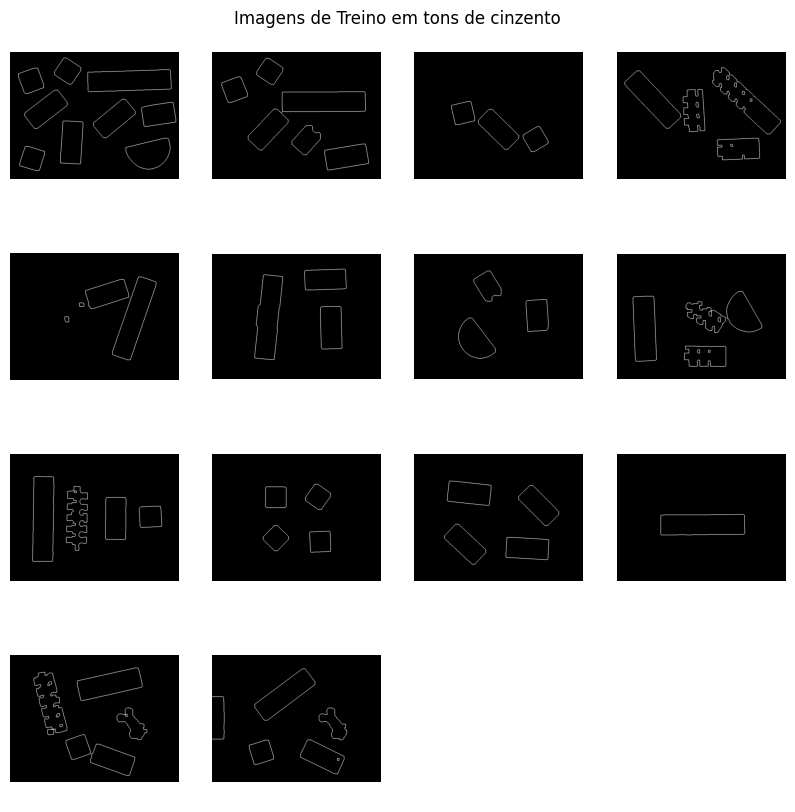

In [1600]:
# morphImages = []
# kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# output_dir = 'output_images'
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# i = 0

# for binImage in binImages:
#     morph = cv2.morphologyEx(binImage,cv2.MORPH_CLOSE,kernel,1)
#     morph = cv2.erode(morph, kernel, iterations=10)

#     morph = cv2.dilate(morph, kernel, iterations=5)
    
#     # morph = cv2.morphologyEx(binImage,cv2.MORPH_GRADIENT,kernel,8)
#     morphImages.append(morph)
#     filename = os.path.join(output_dir, f'morph_image_{i}.png')
    
#     cv2.imwrite(filename, morph)
#     i+=1

# #Representação das imagens de treino
# plt.figure(figsize=(5,16))
# plt.title("Imagens de Treino em tons de cinzento")
# plt.axis('off')

# for i, image in enumerate(morphImages):
#     plt.subplot(7, 2, i+1)  # 7 linhas, 2 colunas
#     plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#     plt.axis('off')

# plt.show()

morphImages = []
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(4,4))
output_dir = 'output_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

i = 0

for binImage in binImages:
    morph = cv2.erode(binImage, kernel, iterations=6)

    morph = cv2.dilate(morph, kernel, iterations=4)
    morph = cv2.morphologyEx(morph,cv2.MORPH_GRADIENT,cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)),1)
    morphImages.append(morph)
    filename = os.path.join(output_dir, f'morph_image_{i}.png')
    
    cv2.imwrite(filename, morph)
    i+=1

#Representação das imagens de treino
plt.figure(figsize=(10,10))
plt.title("Imagens de Treino em tons de cinzento")
plt.axis('off')

for i, image in enumerate(morphImages):
    plt.subplot(4, 4, i+1)  # 7 linhas, 2 colunas
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()

In [1601]:
# def get_properties_lego(contours, hierarchy):
#     # Filtrar contornos que não são filhos (excluir objetos dentro de outros)
#     no_parents = np.bitwise_and(hierarchy[:,:,2]==-1, hierarchy[:,:,3]==-1).flatten()

#     # Calcular o aspect ratio para ver se o contorno é retangular (peças de lego)
#     aspect_ratios = [get_aspect_ratio(cont) for cont in contours]

#     # Definir uma faixa de aspect ratio aceitável para peças de LEGO (retângulos ou quadrados)
#     lego_detected = [(0.2 < ar < 0.87) or (0.89<ar<0.92) or (0.94<ar<1.422) or (1.45 < ar < 4.5) for ar in aspect_ratios]
#     # print('ar-->' , aspect_ratios)
        
#     # Filtrar as peças válidas
#     valid_legos = np.bitwise_and(no_parents, lego_detected)

#     # Calcular o centro de massa (centroid) e área
#     areas = [cv2.contourArea(cont) for cont in contours]
#     bounding_rects = [cv2.boundingRect(cont) for cont in contours]
#     moments = [cv2.moments(cont) for cont in contours]

#     # Calcular os centros de massa (centroid) das peças válidas
#     centroids = []
#     for i, moment in enumerate(moments):
#         if moment["m00"] != 0:
#             cX = int(moment["m10"] / moment["m00"])
#             cY = int(moment["m01"] / moment["m00"])
#             centroids.append((cX, cY))
#         else:
#             centroids.append(None)

#     return valid_legos, areas, moments, centroids, bounding_rects

# def get_aspect_ratio(contour):
#     # Encontra a bounding box do contorno (retângulo que envolve a peça)
#     x, y, w, h = cv2.boundingRect(contour)
#     return float(w) / h  # Aspect ratio é a razão entre a largura e a altura

# Circularity functions
def calculate_mu_r(points, center):
    K = len(points)  # Number of points
    radial_distances = [np.linalg.norm(np.array(point) - np.array(center)) for point in points]
    mu_r = sum(radial_distances) / K  # Average radial distance
    return mu_r

def calculate_sigma_r(points, center, mu_r):
    K = len(points)  # Number of points
    radial_distances = [np.linalg.norm(np.array(point) - np.array(center)) for point in points]
    sigma_r = np.sqrt(sum([(distance - mu_r) ** 2 for distance in radial_distances]) / K)
    return sigma_r

def calculate_c2(points, center):
    mu_r = calculate_mu_r(points, center)
    sigma_r = calculate_sigma_r(points, center, mu_r)
    if sigma_r == 0:  # Avoid division by zero
        return 0
    C2 = mu_r / sigma_r  # Circularity measure
    return C2

# Aspect ratio function
def get_aspect_ratio(contour):
    x, y, w, h = cv2.boundingRect(contour)
    return float(w) / h

# Main function to process LEGO pieces and include circularity filtering
def get_properties_lego(contours, hierarchy):
    no_parents = np.bitwise_and(hierarchy[:, :, 2] == -1, hierarchy[:, :, 3] == -1).flatten()

    aspect_ratios = [get_aspect_ratio(cont) for cont in contours]
    

    areas = [cv2.contourArea(cont) for cont in contours]
    bounding_rects = [cv2.boundingRect(cont) for cont in contours]
    moments = [cv2.moments(cont) for cont in contours]

    centroids = []
    for i, moment in enumerate(moments):
        if moment["m00"] != 0:
            cX = int(moment["m10"] / moment["m00"])
            cY = int(moment["m01"] / moment["m00"])
            centroids.append((cX, cY))
        else:
            centroids.append(None)
    circularity_values = []
    for i, cont in enumerate(contours):
        if centroids[i]:  # Ensure centroid is valid
            points = cont.squeeze(axis=1)  # Extract contour points
            circularity_values.append(calculate_c2(points, centroids[i]))
        else:
            circularity_values.append(None)

    # Filter out pieces based on circularity
    circularity_threshold_min1 = 0  # Minimum value for rectangular shapes
    circularity_threshold_max1 = 5.33 # Upper bound for circularity values
    circularity_threshold_min2 = 6 # Minimum value for rectangular shapes
    circularity_threshold_max2 = 12 # Upper bound for circularity values
    # circularity_threshold_max2 = 11 # Upper bound for circularity values
    valid_legos_by_circularity = [(circularity_threshold_min1 < circularity_values[i] < circularity_threshold_max1 
                                   or circularity_threshold_min2 < circularity_values[i] < circularity_threshold_max2 ) 
                                  for i in range(len(contours))]
    
    # lego_detected = [(0.2 < ar < 0.87) or (0.89 < ar < 0.92) or (0.94 < ar < 1.422) or (1.45 < ar < 4.5) for ar in aspect_ratios]
    valid_legos = np.bitwise_and(no_parents, valid_legos_by_circularity)
    

    return valid_legos, areas, moments, centroids, bounding_rects



Imagem número 1:
Número de peças de LEGO detectadas: 9
Imagem número 2:
Número de peças de LEGO detectadas: 6
Imagem número 3:
Número de peças de LEGO detectadas: 3
Imagem número 4:
Número de peças de LEGO detectadas: 4
Imagem número 5:
Número de peças de LEGO detectadas: 4
Imagem número 6:
Número de peças de LEGO detectadas: 3
Imagem número 7:
Número de peças de LEGO detectadas: 2
Imagem número 8:
Número de peças de LEGO detectadas: 3
Imagem número 9:
Número de peças de LEGO detectadas: 4
Imagem número 10:
Número de peças de LEGO detectadas: 4
Imagem número 11:
Número de peças de LEGO detectadas: 4
Imagem número 12:
Número de peças de LEGO detectadas: 1
Imagem número 13:
Número de peças de LEGO detectadas: 5
Imagem número 14:
Número de peças de LEGO detectadas: 5


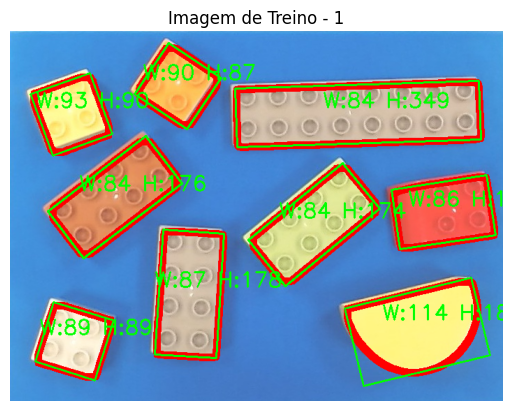

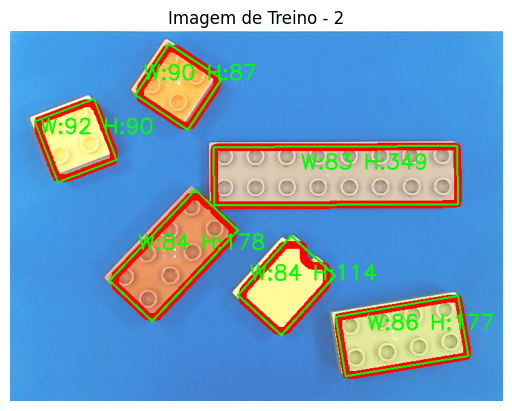

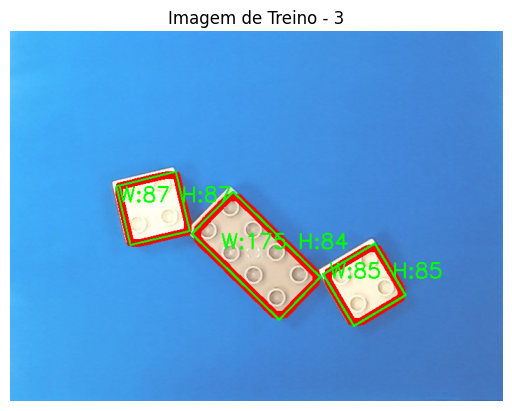

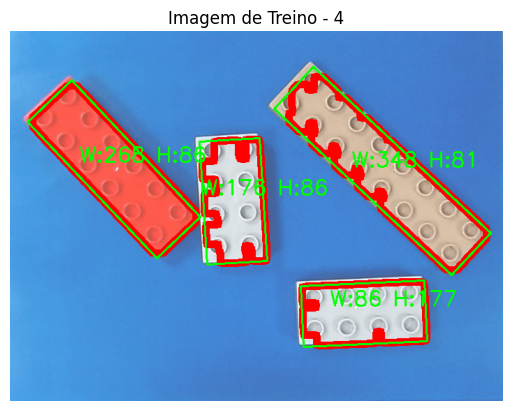

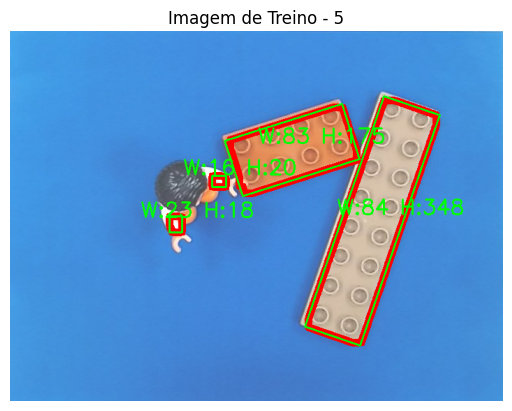

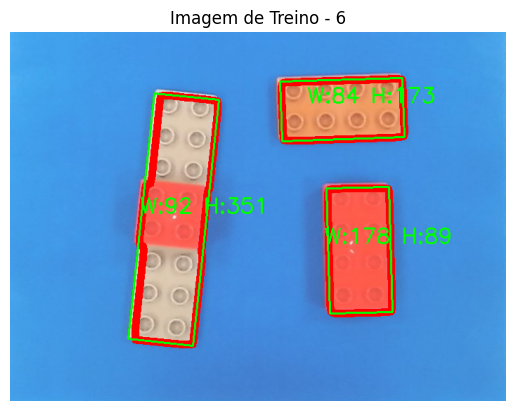

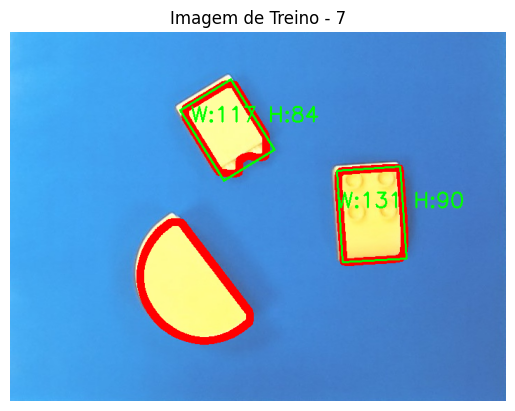

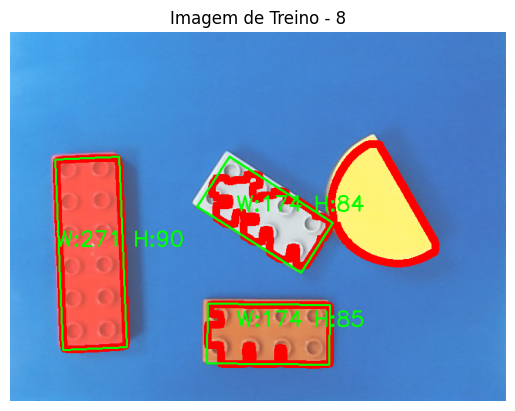

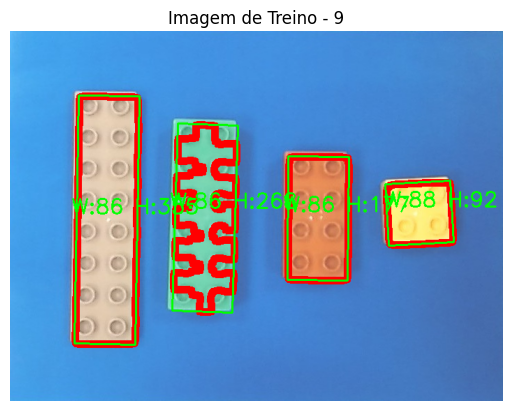

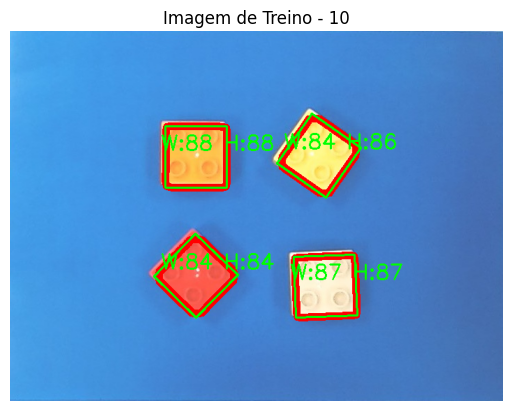

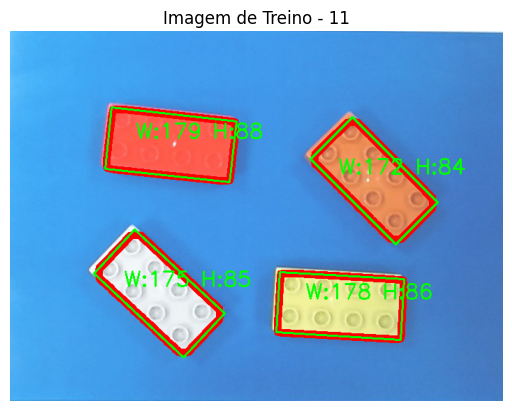

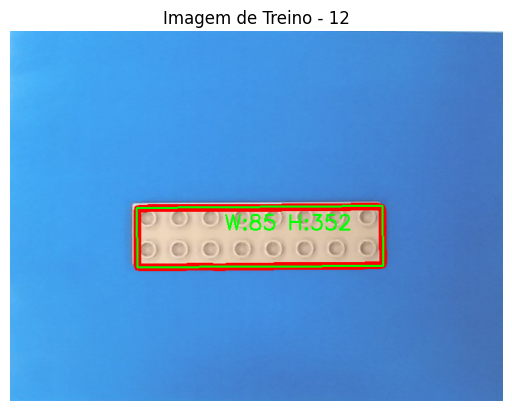

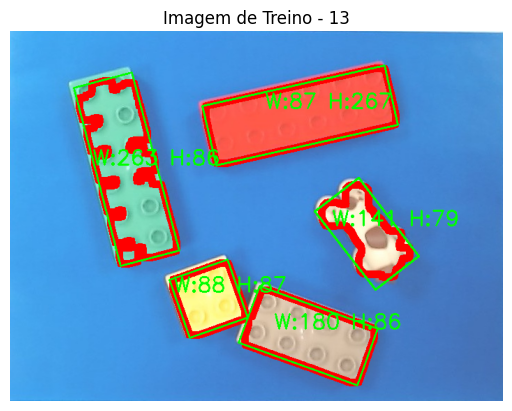

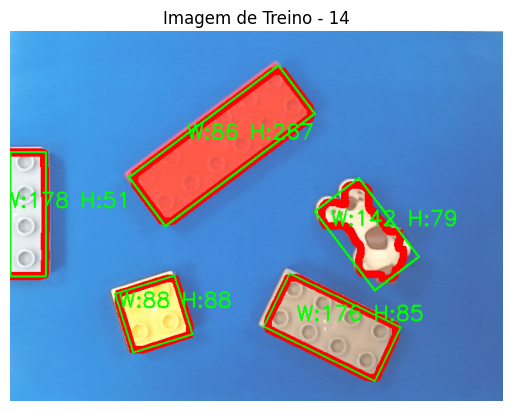

In [1602]:
i = 0
for image in morphImages:
    # Encontrar contornos e hierarquia
    contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    # Desenhar os contornos
    cv2.drawContours(images[i], contours, -1, (0, 0, 255), 10, hierarchy=hierarchy)
    
    # Processar os contornos para contar peças de LEGO
    if hierarchy is not None:
        valid_legos, areas, moments, centroids, bounding_rects = get_properties_lego(contours, hierarchy)
        
        print(f"Imagem número {i+1}:")
        print('Número de peças de LEGO detectadas:', np.sum(valid_legos))
        
        # Adicionar texto nas peças detectadas
        for j, valid in enumerate(valid_legos):
            if valid and centroids[j] is not None:  # Verificar se é uma peça de LEGO válida
                cX, cY = centroids[j]

                # Get the rotated bounding rectangle (minAreaRect)
                rect = cv2.minAreaRect(contours[j])
                box = cv2.boxPoints(rect)  # Get the four corners of the rotated rectangle
                box = np.int32(box)  # Convert them to integer
                w, h = rect[1]  # Get width and height from minAreaRect

                # Draw the rotated rectangle
                cv2.drawContours(images[i], [box], 0, (0, 255, 0), 2)

                # Add the width and height as text on the image
                cv2.putText(images[i], f"W:{int(w)} H:{int(h)}", (cX - 50, cY - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                
                # print(f'Peça {j+1} - Largura: {w}, Altura: {h}')
    
    i += 1

# Representação das imagens de treino com os contornos desenhados
for i, image in enumerate(images[:14]):
    plt.title("Imagem de Treino - " + str(i+1))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()



In [1603]:
print('Peça 2x2')
piece2x2H = [108,111,103,102,98,106,135,90,89,107,104,137]
piece2x2W = [105,108,112,145,109,111,99,86,106,95,96,89,107,90,104,103]
meanH2x2 = np.round(np.mean(piece2x2H),3)
stdH2x2 = np.round(np.std(piece2x2H),3)
meanW2x2 = np.round(np.mean(piece2x2W),3)
stdW2x2 = np.round(np.std(piece2x2W),3)
print('Média altura 2x2: ',meanH2x2)
print('Desvio padrão altura 2x2: ', stdH2x2)
print('Média largura 2x2: ',meanW2x2)
print('Desvio padrão largura 2x2: ', stdW2x2)
print()
print('Peça 4x4')
piece4x4H = [176,174,178,178,177,175,176,177,175,173,178,174,174,177,179,172,178,180,178,176]
piece4x4W = [84,87,86,83,89,90,85,88] ## não meti ainda a metade da ultima peça
meanH4x4 = np.round(np.mean(piece4x4H),3)
stdH4x4 = np.round(np.std(piece4x4H),3)
meanW4x4 = np.round(np.mean(piece4x4W),3)
stdW4x4 = np.round(np.std(piece4x4W),3)
print('Média altura 2x2: ',meanH4x4)
print('Desvio padrão altura 2x2: ', stdH4x4)
print('Média largura 2x2: ',meanW4x4)
print('Desvio padrão largura 2x2: ', stdW4x4)
print()
print('Peça 6x6')
piece6x6H = [268,271,263,267]
piece6x6W = [86,87,90] 
meanH6x6 = np.round(np.mean(piece6x6H),3)
stdH6x6 = np.round(np.std(piece6x6H),3)
meanW6x6 = np.round(np.mean(piece6x6W),3)
stdW6x6 = np.round(np.std(piece6x6W),3)
print('Média altura 2x2: ',meanH6x6)
print('Desvio padrão altura 2x2: ', stdH6x6)
print('Média largura 2x2: ',meanW6x6)
print('Desvio padrão largura 2x2: ', stdW6x6)
print()
print('Peça 8x8')
piece8x8H = [349,348,351,355,352]
piece8x8W = [84,83,81,92,86,85]
meanH8x8 = np.round(np.mean(piece8x8H),3)
stdH8x8 = np.round(np.std(piece8x8H),3)
meanW8x8 = np.round(np.mean(piece8x8W),3)
stdW8x8 = np.round(np.std(piece8x8W),3)
print('Média altura 2x2: ',meanH8x8)
print('Desvio padrão altura 2x2: ', stdH8x8)
print('Média largura 2x2: ',meanW8x8)
print('Desvio padrão largura 2x2: ', stdW8x8)

Peça 2x2
Média altura 2x2:  107.5
Desvio padrão altura 2x2:  14.268
Média largura 2x2:  104.062
Desvio padrão largura 2x2:  13.146

Peça 4x4
Média altura 2x2:  176.25
Desvio padrão altura 2x2:  2.071
Média largura 2x2:  86.5
Desvio padrão largura 2x2:  2.291

Peça 6x6
Média altura 2x2:  267.25
Desvio padrão altura 2x2:  2.861
Média largura 2x2:  87.667
Desvio padrão largura 2x2:  1.7

Peça 8x8
Média altura 2x2:  351.0
Desvio padrão altura 2x2:  2.449
Média largura 2x2:  85.167
Desvio padrão largura 2x2:  3.436


In [1604]:
#média-desvioPadrão*2.2
dic_Height = {
    '2x2':[76.124,138.89],
    '4x2':[171.694,180.806],
    '6x2':[260.956,273.544],
    '8x2':[345.612,356.388],
}
dic_Width = {
    '2x2':[92.573,117.961],
    '4x4':[84.209,88.791],
    '6x6':[85.967,89.367],
    '8x8':[81.731,88.603],
}


In [1605]:
def get_text(piece,height):
    if not piece or not (76.124<=height<=138.89) and not (171,694<=height<=180.806) and not(260.956<=height<=273.544) and not(345.612<=height<=356.388):
        return 'object'
    for key, value in dic_Height.items():
        if(value[0]<=height<=value[1]):
            print(value[0] ,' ',height,' ',value[1])
            return key  
    return 'object'

def classificator(img, pieces,height,moments):
    numberOfLegos = 0
    i = 0
    for piece in pieces:
        moment = moments[i]

        text = get_text(piece,height[i])
        i+=1
        if(text!='object'):
            numberOfLegos+=1

        x = int(moment['m10']/moment['m00']) - len(text)*9
        y = int(moment['m01']/moment['m00'])

        #insere o texto na imagem
        imgClassification = cv2.putText(img, text, (int(x), int(y)), fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                                          fontScale = 1.3, color = (0,0,0), thickness = 2, lineType = cv2.LINE_AA)

    return imgClassification, numberOfLegos


76.124   89.54914093017578   138.89
171.694   178.6804656982422   180.806
76.124   137.65188598632812   138.89
171.694   174.91281127929688   180.806
171.694   176.92129516601562   180.806
345.612   349.500732421875   356.388
76.124   93.53742218017578   138.89
76.124   90.41613006591797   138.89
Número total de peças da imagem: 8


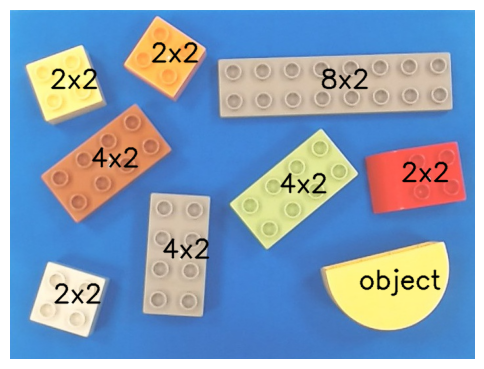

In [1606]:
imagesNew = []
#Obter os nomes dos ficheiros das imagens
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

#Ler as imagens de treino e adicionar ao array 'images'
for image_file in image_files:
    img = cv2.imread(images_dir + image_file)

    if img is not None:
        imagesNew.append(img)
    else:
        print("Unable to read image:", image_file)


contours, hierarchy = cv2.findContours(morphImages[0],cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
if(hierarchy is not None):
    validLegos, areas, moments,centroids, bounding_rects = get_properties_lego(contours,hierarchy)
    height = []
    for contour in contours:
        rect = cv2.minAreaRect(contour)
        w, h = rect[1]  # Get width and height from minAreaRect
        if h>=w:
            height.append(h)
        else:
            height.append(w)
    
    classImage, numberOfLegos = classificator(imagesNew[0],validLegos,height,moments)
    print('Número total de peças da imagem:', numberOfLegos)

    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(classImage,cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    


76.124   89.54914093017578   138.89
171.694   178.6804656982422   180.806
76.124   137.65188598632812   138.89
171.694   174.91281127929688   180.806
171.694   176.92129516601562   180.806
345.612   349.500732421875   356.388
76.124   93.53742218017578   138.89
76.124   90.41613006591797   138.89
Número total de peças da imagem 1: 8


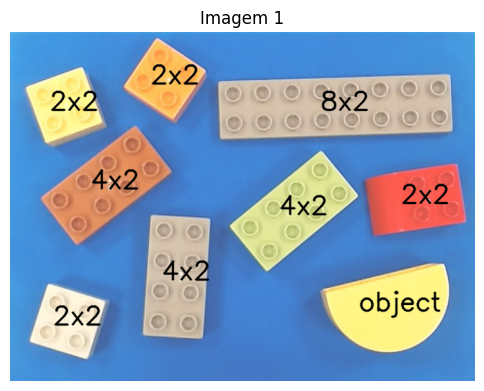

171.694   177.7152862548828   180.806
76.124   114.39297485351562   138.89
171.694   178.65231323242188   180.806
345.612   349.1401672363281   356.388
76.124   92.79043579101562   138.89
76.124   90.6934814453125   138.89
Número total de peças da imagem 2: 6


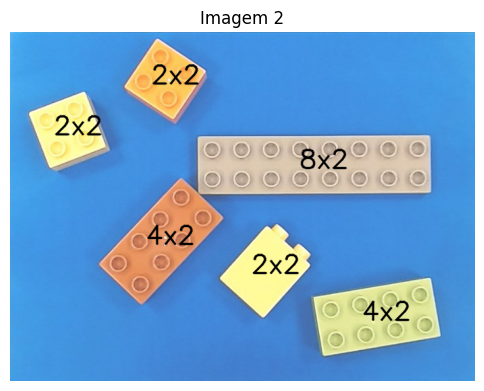

76.124   85.77425384521484   138.89
171.694   175.00900268554688   180.806
76.124   87.32093811035156   138.89
Número total de peças da imagem 3: 3


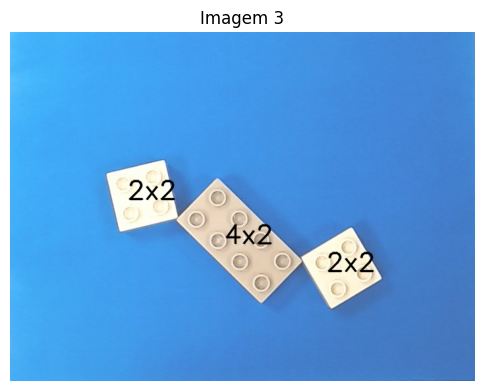

171.694   177.22610473632812   180.806
171.694   176.6005859375   180.806
260.956   268.93853759765625   273.544
345.612   348.3520202636719   356.388
Número total de peças da imagem 4: 4


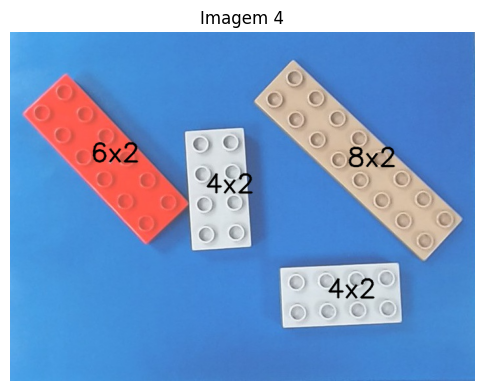

171.694   175.77149963378906   180.806
345.612   348.50341796875   356.388
Número total de peças da imagem 5: 2


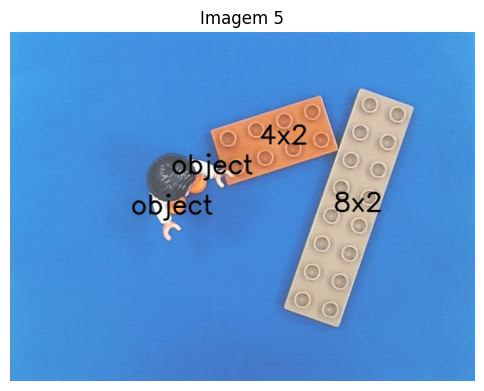

171.694   178.39425659179688   180.806
345.612   351.5710144042969   356.388
171.694   173.84222412109375   180.806
Número total de peças da imagem 6: 3


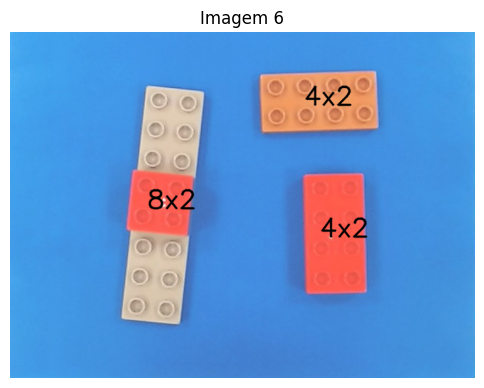

76.124   131.13446044921875   138.89
76.124   117.52886199951172   138.89
Número total de peças da imagem 7: 2


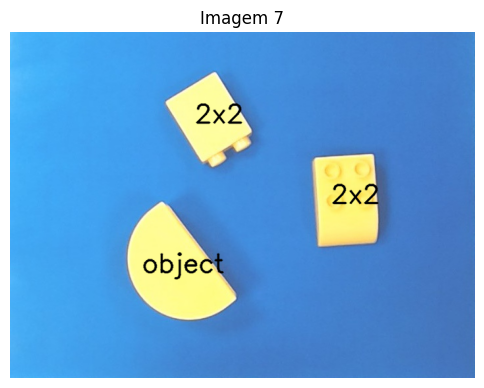

171.694   174.43203735351562   180.806
171.694   174.86802673339844   180.806
260.956   271.44207763671875   273.544
Número total de peças da imagem 8: 3


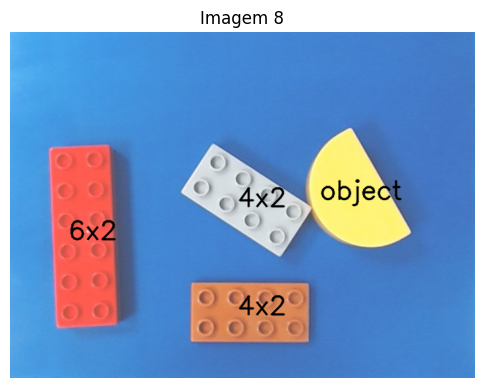

76.124   92.97657012939453   138.89
171.694   177.4501953125   180.806
260.956   268.0903015136719   273.544
345.612   355.6607666015625   356.388
Número total de peças da imagem 9: 4


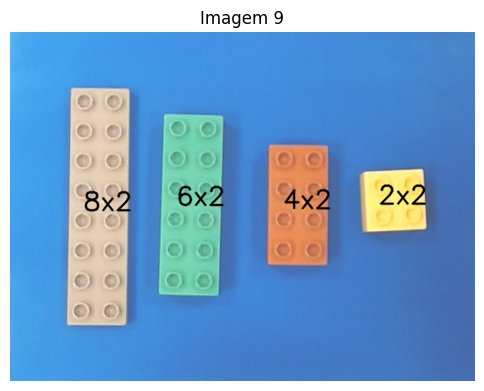

76.124   87.38249969482422   138.89
76.124   84.95341491699219   138.89
76.124   88.0   138.89
76.124   86.9600830078125   138.89
Número total de peças da imagem 10: 4


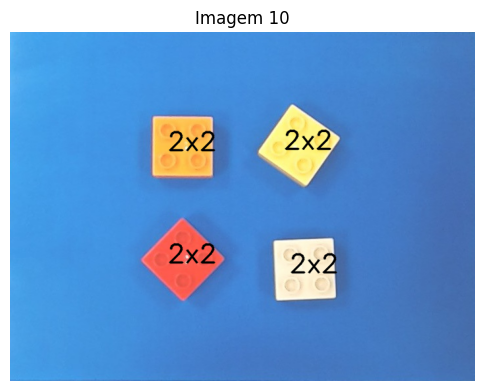

171.694   178.25755310058594   180.806
171.694   175.5507354736328   180.806
171.694   172.5340576171875   180.806
171.694   179.74057006835938   180.806
Número total de peças da imagem 11: 4


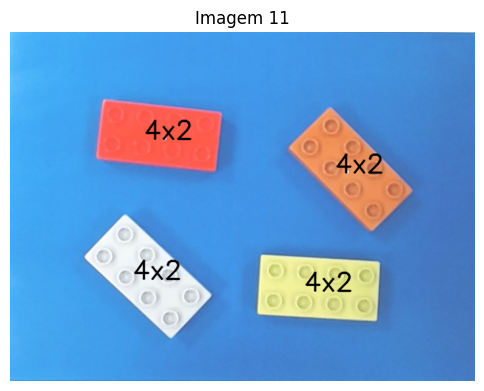

345.612   352.13604736328125   356.388
Número total de peças da imagem 12: 1


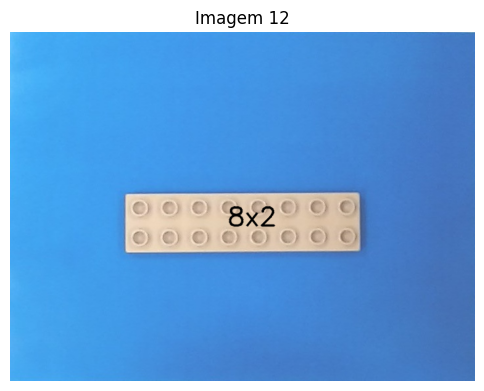

171.694   180.02389526367188   180.806
76.124   88.05707550048828   138.89
260.956   263.33123779296875   273.544
260.956   267.3280029296875   273.544
Número total de peças da imagem 13: 4


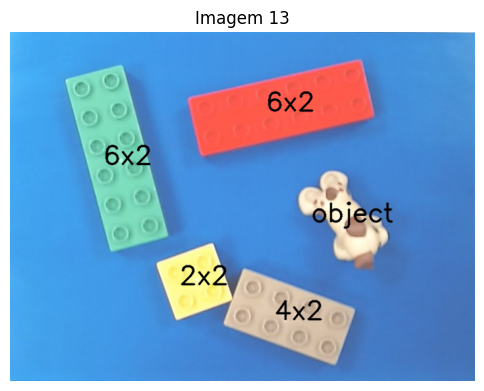

76.124   88.97805786132812   138.89
171.694   176.50689697265625   180.806
171.694   178.0   180.806
260.956   267.1999816894531   273.544
Número total de peças da imagem 14: 4


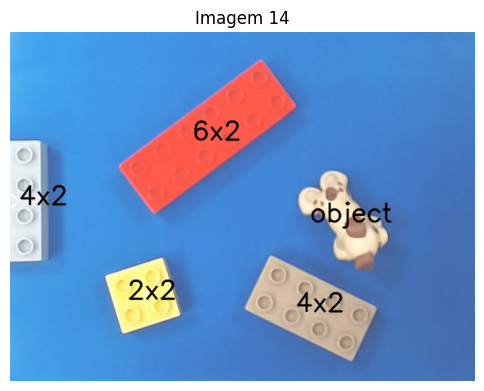

In [1607]:
imagesNew = []
# Obter os nomes dos ficheiros das imagens
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

# Ler as imagens de treino e adicionar ao array 'imagesNew'
for image_file in image_files:
    img = cv2.imread(images_dir + image_file)

    if img is not None:
        imagesNew.append(img)
    else:
        print("Unable to read image:", image_file)

# Loop over all images in imagesNew
for i, img in enumerate(imagesNew):
    # Encontrar contornos e hierarquia para cada imagem em morphImages
    contours, hierarchy = cv2.findContours(morphImages[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    if hierarchy is not None:
        validLegos, areas, moments, centroids, bounding_rects = get_properties_lego(contours, hierarchy)
        height = []
        for contour in contours:
            rect = cv2.minAreaRect(contour)
            w, h = rect[1]  # Get width and height from minAreaRect
            height.append(h if h >= w else w)  # Append the larger dimension
        
        # Classificar a imagem e contar o número de peças LEGO
        classImage, numberOfLegos = classificator(img, validLegos, height, moments)
        print(f'Número total de peças da imagem {i + 1}:', numberOfLegos)

        # Exibir a imagem processada
        plt.figure(figsize=(6, 6))
        plt.title(f"Imagem {i + 1}")
        plt.imshow(cv2.cvtColor(classImage, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()